In [156]:
(* Task #1 *)

rule = {R -> 8.31, T -> 500};

f[M_, u_] := 4 Pi n (M/(2 Pi R T))^(3/2) Exp[-M u^2/(2 R T)] u^2
(* n：分子数密度，即单位体积内的气体分子数目；M：气体分子的摩尔质量；
  麦克斯韦速度分布律：单位体积内，速度介于 u ~ u + du 的气体分子数目；*)

In [89]:
rho[M_, u_] := 4 Pi (M/(2 Pi R T))^(3/2) Exp[-M u^2/(2 R T)] u^2
(* 是否应该用rho替代f？！ *)

-Graphics-
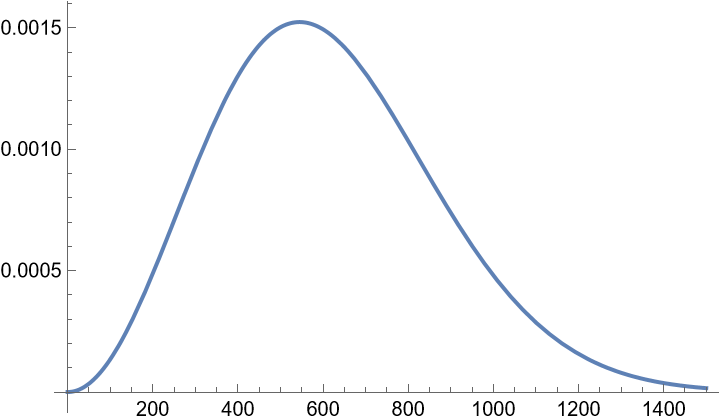

In [160]:
Plot[rho[0.028,u]/.rule, {u,0,1500}]
(* 使用规则变换，避免与后续的符号计算冲突。 *)

In [161]:
Integrate[rho[M,u], {u,0,Infinity}, Assumptions -> M/(R*T) > 0]
(* 为了检验是否定义正确，可以进行积分； 为了避免返回条件表达式，使用Assumptions选项！*)

1

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[2]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[2]], Directive[Opacity[1.], 
 
>       RGBColor[0.560181, 0.691569, 0.194885], AbsoluteThickness[2]]}, {H2, N2, O2}, 
 
>     LegendMarkers -> None, LabelStyle -> {}, LegendLayout -> Column], After, Identity]]
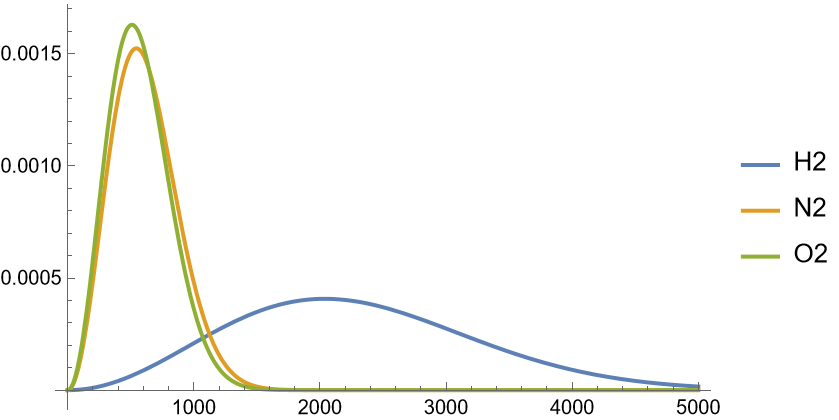

In [191]:
Plot[{rho[0.002,u]/.rule, rho[0.028,u]/.rule, rho[0.032,u]/.rule},
    {u,0,5000}, PlotRange -> All, 
        PlotLegends -> {"H2","N2","O2"}]

-Graphics-
-Graphics-
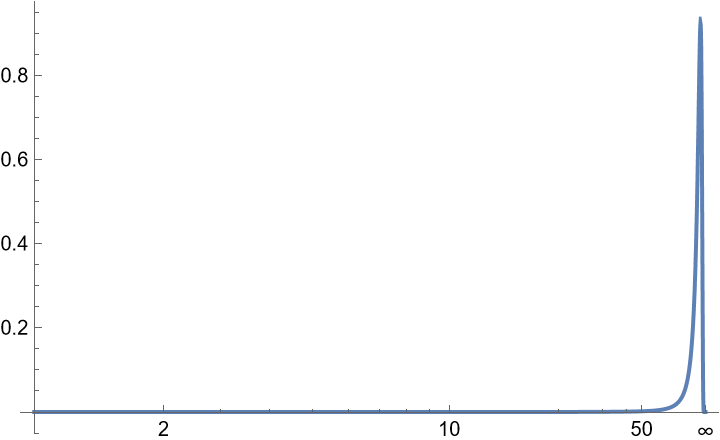
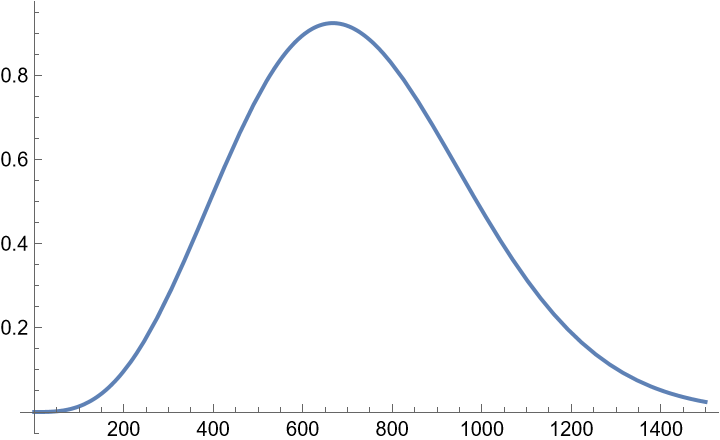

In [166]:
(* Task #2 平均速率（权重平均值 uwa） 针对上述三种气体 *)
Plot[u rho[0.028,u]/.rule, {u,0,Infinity},PlotRange -> All]
Plot[u rho[0.028,u]/.rule, {u,0,1500},PlotRange -> All]

2        R T
2 Sqrt[--] Sqrt[---]
       Pi        M
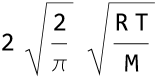

In [169]:
Integrate[u rho[M,u], {u,0,Infinity}, Assumptions -> M/(R*T) > 0]

In [215]:
uwa[M_] := Sqrt[8 R T/(Pi M)]

In [216]:
uwa[0.002]/.rule

2300.07

In [241]:
uwa[0.028]/.rule

614.719

In [219]:
uwa[0.032]/.rule

575.017

In [224]:
{uwa[0.002], uwa[0.028], uwa[0.032]}/.rule
(* 利用“列表”简化。 *)

{2300.07, 614.719, 575.017}

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[2]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
>       AbsoluteThickness[2]], Directive[Opacity[1.], 
 
>       RGBColor[0.560181, 0.691569, 0.194885], AbsoluteThickness[2]]}, {H2, N2, O2}, 
 
>     LegendMarkers -> None, LabelStyle -> {}, LegendLayout -> Column], After, Identity]]
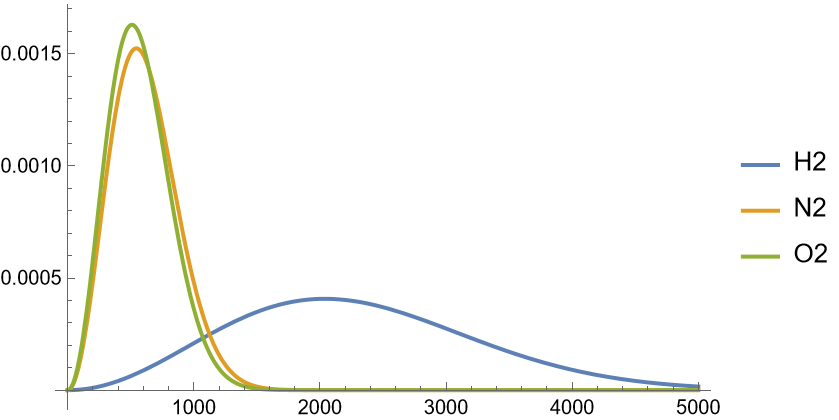

In [235]:
(* Task #3 最概然速率 巩固符号计算！*)

Plot[{rho[0.002,u]/.rule, rho[0.028,u]/.rule, rho[0.032,u]/.rule},
    {u,0,5000}, PlotRange -> All, 
        PlotLegends -> {"H2","N2","O2"}]

Sqrt[2] Sqrt[R] Sqrt[T]          Sqrt[2] Sqrt[R] Sqrt[T]
{{u -> 0}, {u -> -(-----------------------)}, {u -> -----------------------}}
                           Sqrt[M]                          Sqrt[M]
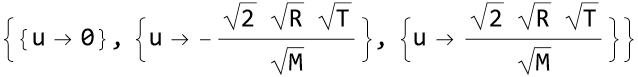

In [242]:
Solve[
    D[rho[M,u],u] == 0, u]

In [230]:
ump[M_] := Sqrt[2 R T/M]

In [231]:
{ump[0.002], ump[0.028], ump[0.032]}/.rule

{2038.38, 544.78, 509.595}

In [243]:
Maximize[{rho[M,u]/.rule/.{M -> 0.002}, u > 0 && u < 5000}, u]

{0.000407291, {u -> 2038.4}}

In [244]:
Maximize[{rho[M,u]/.rule/.{M -> 0.028}, u > 0 && u < 5000}, u]

{0.00152394, {u -> 544.73}}

In [245]:
Maximize[{rho[M,u]/.rule/.{M -> 0.032}, u > 0 && u < 5000}, u]

{0.00162916, {u -> 509.544}}